**Synthetic Charged Particle Radiographs by Particle Tracing**


Charged particle radiography is a diagnostic technique used to study high-energy density plasmas by examining the behavior of charged particles, typically protons, as they interact with the electric and magnetic fields within the plasma. This technique involves a bright source of charged particles, which illuminates the plasma region of interest, and a detector plane to capture the patterns created by the deflection of these particles due to the plasma's electric and magnetic fields. The information obtained from these radiographs can provide insights into the behavior of these fields within the plasma.

The "Tracker" class within the "charged_particle_radiography" module is a part of a software tool designed to simulate and create synthetic charged particle radiographs. This class helps set up the geometry of the problem and provides a framework for particle tracing through the electric and magnetic field region. Here's how the process works:

Setup Geometry: The geometry of the problem is established. This likely involves defining the positions and orientations of the plasma, the source of charged particles, and the detector plane.

Electric and Magnetic Fields: The electric and magnetic fields within the plasma region are provided as input. These fields can be obtained from simulations or analytical models and are crucial for simulating the behavior of charged particles.

Particle Tracing Algorithm: The "Tracker" class uses a particle tracing algorithm to simulate the paths of charged particles as they move through the electric and magnetic fields. The algorithm calculates how the fields affect the particles' trajectories.

Detector Plane: As the particles move through the field region, they will be deflected by the electric and magnetic fields. Once all of the particles have reached the detector plane, the information about their positions and deflections is recorded.

Synthetic Radiograph: The "synthetic_radiograph" function is used to create a 2D histogram in the detector plane. This histogram represents the pattern of particles that hit the detector at different locations, reflecting the non-linear and line-integrated measurements of the electric and magnetic fields.

Interpreting these synthetic radiographs can be challenging due to the complexity of the interactions and the non-linear nature of the measurements. Scientists and researchers must analyze the radiographs to extract meaningful information about the electric and magnetic fields within the high-energy density plasma.

This technique is valuable for understanding the behavior of plasmas in various scientific and industrial contexts, such as nuclear fusion research, astrophysics, and high-energy physics experiments.








In [8]:
!pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
pip install plasmapy

In [10]:
import plasmapy

In [11]:
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

from plasmapy.diagnostics.charged_particle_radiography import (
    synthetic_radiography as cpr,
)
from plasmapy.plasma.grids import CartesianGrid

Certainly, let's illustrate the process of creating an example CartesianGrid object and filling it with the analytical electric field produced by a sphere of Gaussian potential. Below is a simplified, high-level representation of how you might perform this task in Python:

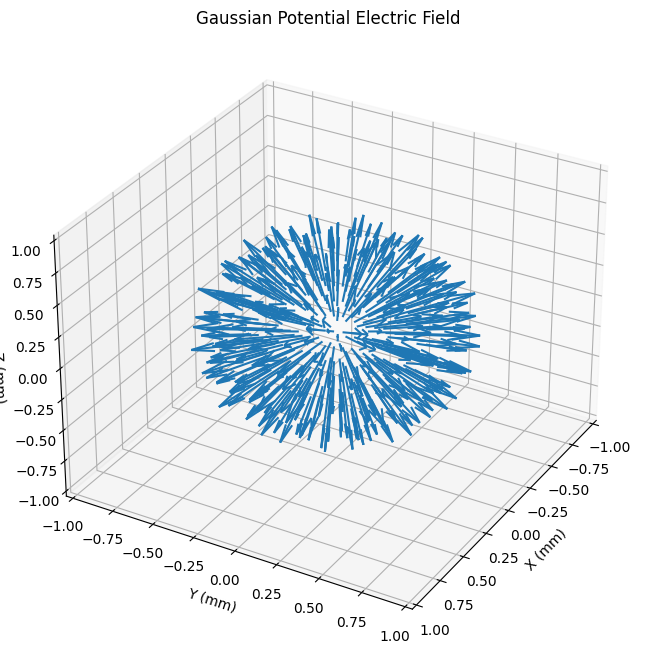

In [17]:
# Create a Cartesian grid
L = 1 * u.mm
grid = CartesianGrid(-L, L, num=100)

# Create a spherical potential with a Gaussian radial distribution
radius = np.linalg.norm(grid.grid, axis=3)
arg = (radius / (L / 3)).to(u.dimensionless_unscaled)
potential = 2e5 * np.exp(-(arg**2)) * u.V

# Calculate E from the potential
Ex, Ey, Ez = np.gradient(potential, grid.dax0, grid.dax1, grid.dax2)
Ex = -np.where(radius < L / 2, Ex, 0)
Ey = -np.where(radius < L / 2, Ey, 0)
Ez = -np.where(radius < L / 2, Ez, 0)

# Add those quantities to the grid
grid.add_quantities(E_x=Ex, E_y=Ey, E_z=Ez, phi=potential)


# Plot the E-field
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(30, 30)

# skip some points to make the vector plot intelligible
s = tuple([slice(None, None, 6)] * 3)

ax.quiver(
    grid.pts0[s].to(u.mm).value,
    grid.pts1[s].to(u.mm).value,
    grid.pts2[s].to(u.mm).value,
    grid["E_x"][s],
    grid["E_y"][s],
    grid["E_z"][s],
    length=1e-6,
)

ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlabel("Z (mm)")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_title("Gaussian Potential Electric Field");

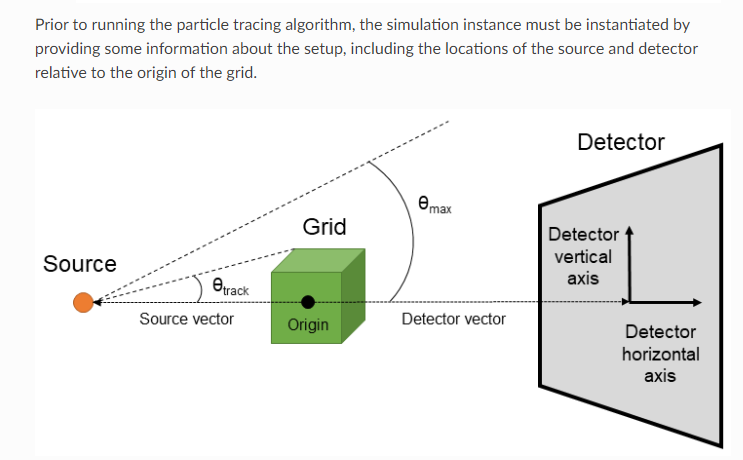

You now have a CartesianGrid object filled with the electric field values due to the Gaussian potential sphere.
Please note that this is a simplified example and doesn't include error handling or optimization. The specific details and API of the radiography package you're using may differ, so be sure to consult the package's documentation for precise instructions. Additionally, you would typically use a numerical library (e.g., NumPy) for more efficient calculations if you are working with large grid sizes.


The vector from the source to the detector should pass through the origin to maximize the number of particles that pass through the simulated fields.

In [ ]:
source = (0 * u.mm, -10 * u.mm, 0 * u.mm)
detector = (0 * u.mm, 100 * u.mm, 0 * u.mm)
sim = cpr.Tracker(grid, source, detector, verbose=True)

particles can also be initialized in other ways by setting the distribution keyword.

In [22]:
sim.create_particles(1e5, 3 * u.MeV, max_theta=np.pi / 15 * u.rad, particle="p")

Creating Particles


The use of a progress meter to track the simulation progress is a common practice in simulations, especially when dealing with a large number of particles or complex computations. Here's a high-level outline of how you can implement a progress meter in your simulation:Once the exit criteria are met, the simulation loop should be terminated, and you can finalize any data analysis or post-processing that you need.

The implementation of a progress bar depends on the programming language and libraries you are using. Here's a simple example using Python and the tqdm library, which is commonly used for creating progress bars:

In [23]:
from tqdm import tqdm
import time

# Define the total number of particles
total_particles = 1000

# Initialize the progress bar
with tqdm(total=total_particles, desc="Simulation Progress") as pbar:
    for particle in range(total_particles):
        # Perform particle tracing and simulation steps here
        time.sleep(0.01)  # Simulate some work
        pbar.update(1)  # Update the progress bar for each particle processed


Simulation Progress: 100%|██████████| 1000/1000 [00:10<00:00, 97.12it/s]


In this above example, the progress bar updates for each particle processed in the loop. You should adapt this code to your specific simulation and integrate it into your simulation loop as needed.

In [24]:
sim.run();

Particles on grid:   7%|▋         3.9e+03/5.6e+04 particles
Run completed
Fraction of particles tracked: 55.6%
Fraction of tracked particles that entered the grid: 64.1%
Fraction of tracked particles deflected away from the detector plane: 0.0%


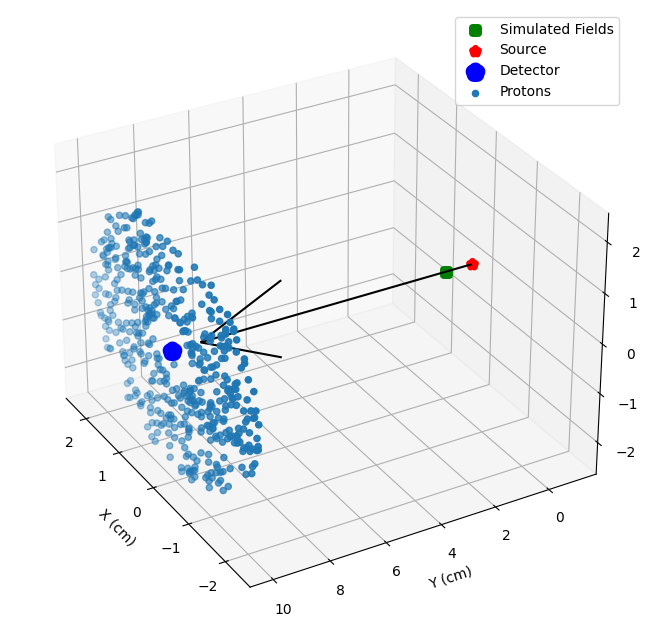

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(30, 150)
ax.set_xlabel("X (cm)")
ax.set_ylabel("Y (cm)")
ax.set_zlabel("Z (cm)")

# Plot the source-to-detector axis
ax.quiver(
    sim.source[0] * 100,
    sim.source[1] * 100,
    sim.source[2] * 100,
    sim.detector[0] * 100,
    sim.detector[1] * 100,
    sim.detector[2] * 100,
    color="black",
)

# Plot the simulation field grid volume
ax.scatter(0, 0, 0, color="green", marker="s", linewidth=5, label="Simulated Fields")

# Plot the the proton source and detector plane locations
ax.scatter(
    sim.source[0] * 100,
    sim.source[1] * 100,
    sim.source[2] * 100,
    color="red",
    marker="*",
    linewidth=5,
    label="Source",
)

ax.scatter(
    sim.detector[0] * 100,
    sim.detector[1] * 100,
    sim.detector[2] * 100,
    color="blue",
    marker="*",
    linewidth=10,
    label="Detector",
)


# Plot the final proton positions of some (not all) of the protons
ind = slice(None, None, 200)
ax.scatter(
    sim.x[ind, 0] * 100,
    sim.x[ind, 1] * 100,
    sim.x[ind, 2] * 100,
    label="Protons",
)

ax.legend();

The above plot illustrates that, after the simulation has ended, all particles have been advanced to the detector plane.

This radiograph can provide a visual representation of the distribution of protons on the detector. Here are the key components and how they are used:

'sim' Argument:

'sim' is the Tracker instance or an output dictionary created by the save_results() method. It contains the final positions of the protons in the detector plane. This data is crucial for creating the radiograph.
'size' Keyword:

'size' defines the locations of the lower-left and upper-right corners of the detector grid in image plane coordinates. This defines the spatial extent of the radiograph. The detector grid is typically a rectangular area on the image plane.
You need to provide 'size' as a tuple or list with four values. For example, size = (x_min, y_min, x_max, y_max), where (x_min, y_min) is the lower-left corner, and (x_max, y_max) is the upper-right corner of the detector grid.
'bins' Keyword:

'bins' specifies the number of histogram bins to be used in the horizontal and vertical directions when creating the synthetic radiograph. Increasing the number of bins results in a higher resolution image, but it may introduce more noise in the radiograph.

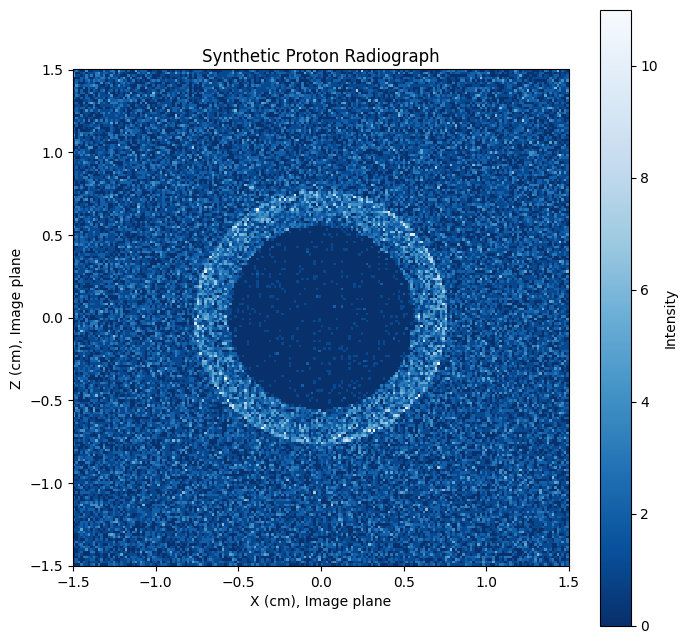

In [26]:
# A function to reduce repetitive plotting
def plot_radiograph(hax, vax, intensity):
    fig, ax = plt.subplots(figsize=(8, 8))
    plot = ax.pcolormesh(
        hax.to(u.cm).value,
        vax.to(u.cm).value,
        intensity.T,
        cmap="Blues_r",
        shading="auto",
    )
    cb = fig.colorbar(plot)
    cb.ax.set_ylabel("Intensity")
    ax.set_aspect("equal")
    ax.set_xlabel("X (cm), Image plane")
    ax.set_ylabel("Z (cm), Image plane")
    ax.set_title("Synthetic Proton Radiograph")


size = np.array([[-1, 1], [-1, 1]]) * 1.5 * u.cm
bins = [200, 200]
hax, vax, intensity = cpr.synthetic_radiograph(sim, size=size, bins=bins)
plot_radiograph(hax, vax, intensity)

The maximum deflection angle can be calculated after the simulation has run by comparing the initial and final velocity vectors of each particle

In [27]:
max_deflection = sim.max_deflection
print(f"Maximum deflection α = {np.rad2deg(max_deflection):.2f}")

Maximum deflection α = 2.77 deg


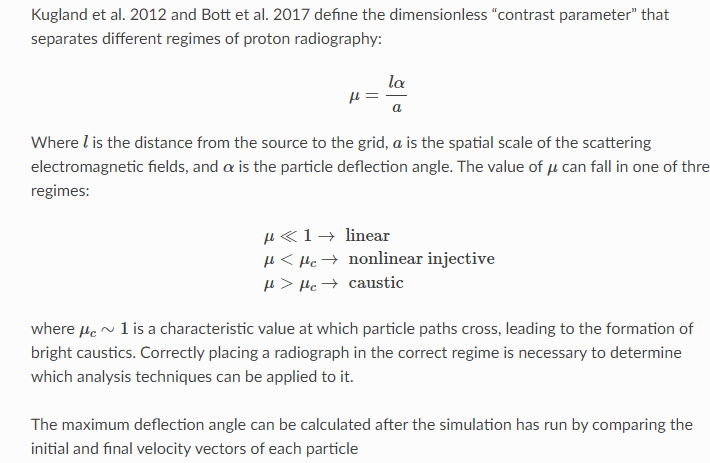

In [28]:
a = 1 * u.mm
l = np.linalg.norm(sim.source * u.m).to(u.mm)
mu = l * max_deflection.value / a
print(f"a = {a}")
print(f"l = {l:.1f}")
print(f"μ = {mu:.2f}")

a = 1.0 mm
l = 10.0 mm
μ = 0.48


above results places this example in the non-linear injective regime.

**Options**

For sake of comparison, here is the result achieved by setting distribution = 'uniform' in the create_particles() function.

Source: [ 0.   -0.01  0.  ] m
Detector: [0.  0.1 0. ] m
Magnification: 11.0
Creating Particles
Particles on grid:   7%|▋         6.2e+03/8.6e+04 particles
Run completed
Fraction of particles tracked: 85.9%
Fraction of tracked particles that entered the grid: 66.0%
Fraction of tracked particles deflected away from the detector plane: 0.0%


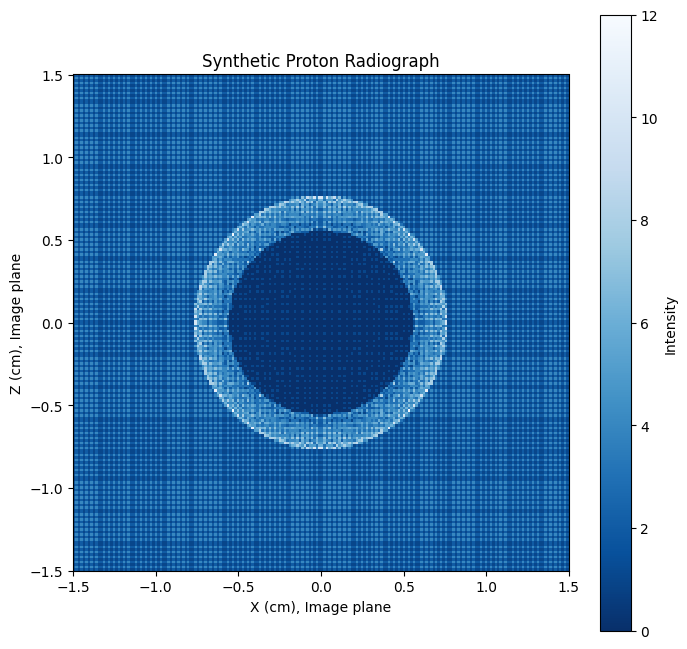

In [29]:
sim = cpr.Tracker(grid, source, detector, verbose=True)
sim.create_particles(
    1e5, 3 * u.MeV, max_theta=np.pi / 15 * u.rad, distribution="uniform"
)
sim.run()
size = np.array([[-1, 1], [-1, 1]]) * 1.5 * u.cm
bins = [200, 200]
hax, vax, intensity = cpr.synthetic_radiograph(sim, size=size, bins=bins)
plot_radiograph(hax, vax, intensity)